<a href="https://colab.research.google.com/github/skerd2498/Linkedin-Network-Visualization/blob/main/Linkedin_Network_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install pyjanitor pyvis --quiet # Before loading the data, we need to install some dependencies that don’t come by default on Google Colab.

**Load libraries**

In [36]:
import pandas as pd
import janitor #Clean APIs for data cleaning
import datetime

from IPython.core.display import display, HTML
from pyvis import network as net #Visualizing network graph
import networkx as nx #Create network graph with Python

In [37]:
filename='/content/Connections.csv'
df=pd.read_csv(filename,skiprows=2) #starting from row 3 because it has notes on two first rows
df.head()

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Hilary,Unachukwu,NaN,Tielle Global Enterprise Ltd,General Manager,01 Jan 2022
1,Klaus,Muçelli,NaN,Shortcut.al,Information Technology Specialist,31 Dec 2021
2,Jessie,Lamontagne,NaN,Kinaxis,Manager Data Science,31 Dec 2021
3,Clinton,Farr,NaN,Princeton ISD,High School Science/Mathematics Teacher,30 Dec 2021
4,Blerina,Babaliu,NaN,Vodafone,Resourcing Lead,30 Dec 2021


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     1991 non-null   object
 1   Last Name      1991 non-null   object
 2   Email Address  45 non-null     object
 3   Company        1940 non-null   object
 4   Position       1940 non-null   object
 5   Connected On   2002 non-null   object
dtypes: object(6)
memory usage: 94.0+ KB


**Data Cleaning**

In [39]:
df=df.clean_names() #cleaning the column names
df

,first_name,last_name,email_address,company,position,connected_on
0,Hilary,Unachukwu,NaN,Tielle Global Enterprise Ltd,General Manager,01 Jan 2022
1,Klaus,Muçelli,NaN,Shortcut.al,Information Technology Specialist,31 Dec 2021
2,Jessie,Lamontagne,NaN,Kinaxis,Manager Data Science,31 Dec 2021
3,Clinton,Farr,NaN,Princeton ISD,High School Science/Mathematics Teacher,30 Dec 2021
4,Blerina,Babaliu,NaN,Vodafone,Resourcing Lead,30 Dec 2021
...,...,...,...,...,...,...
1997,Ardit,Sula,NaN,Upwork,IT Consultant,22 May 2020
1998,Salillari,Group,NaN,SALILLARI GROUP,Company Owner,22 May 2020
1999,Albi,Greva,NaN,Gener2,Director of Marketing and Communication,21 May 2020
2000,Irena,Matraku,NaN,akademi.al,Project Manager,21 May 2020


In [40]:
df1=df.drop(columns=['first_name', 'last_name', 'email_address']) #dropping because of privacy issues

In [41]:
df1=df1.dropna(subset=['company','position']) #dropping missing values of those two columns
df1

,company,position,connected_on
0,Tielle Global Enterprise Ltd,General Manager,01 Jan 2022
1,Shortcut.al,Information Technology Specialist,31 Dec 2021
2,Kinaxis,Manager Data Science,31 Dec 2021
3,Princeton ISD,High School Science/Mathematics Teacher,30 Dec 2021
4,Vodafone,Resourcing Lead,30 Dec 2021
...,...,...,...
1997,Upwork,IT Consultant,22 May 2020
1998,SALILLARI GROUP,Company Owner,22 May 2020
1999,Gener2,Director of Marketing and Communication,21 May 2020
2000,akademi.al,Project Manager,21 May 2020


In [43]:
df1=df1.to_datetime('connected_on', format='%d %b %Y') #onverting the date column to datetime format
df1

/usr/local/lib/python3.7/dist-packages/janitor/functions/to_datetime.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = pd.to_datetime(df[column_name], **kwargs)


,company,position,connected_on
0,Tielle Global Enterprise Ltd,General Manager,2022-01-01
1,Shortcut.al,Information Technology Specialist,2021-12-31
2,Kinaxis,Manager Data Science,2021-12-31
3,Princeton ISD,High School Science/Mathematics Teacher,2021-12-30
4,Vodafone,Resourcing Lead,2021-12-30
...,...,...,...
1997,Upwork,IT Consultant,2020-05-22
1998,SALILLARI GROUP,Company Owner,2020-05-22
1999,Gener2,Director of Marketing and Communication,2020-05-21
2000,akademi.al,Project Manager,2020-05-21


**EDA**

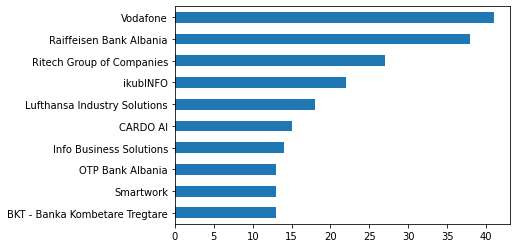

In [50]:
df['company'].value_counts().head(10).plot(kind="barh").invert_yaxis();

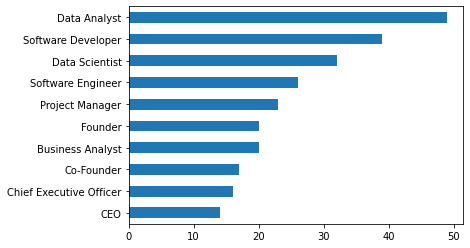

In [46]:
df['position'].value_counts().head(10).plot(kind="barh").invert_yaxis();

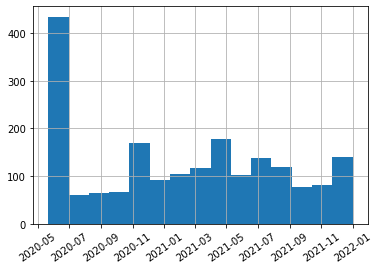

In [52]:
df1['connected_on'].hist(xrot=35, bins=15);

Sum of connections for companies

In [58]:
df_company=df1['company'].value_counts().reset_index()
df_company.columns=['company', 'count']
df_company = df_company.sort_values(by="count", ascending=False)
df_company.head()

,company,count
0,Vodafone,41
1,Raiffeisen Bank Albania,38
2,Ritech Group of Companies,27
3,ikubINFO,22
4,Lufthansa Industry Solutions,18


Sum of connections for possitions

In [63]:
df_positions=df['position'].value_counts().reset_index()
df_positions.columns=['position','count']
df_positions=df_positions.sort_values(by="count",ascending=False)
df_positions

,position,count
0,Data Analyst,49
1,Software Developer,39
2,Data Scientist,32
3,Software Engineer,26
4,Project Manager,23
...,...,...
553,Flutter Developer,1
552,Petroleum Engineering (Summer Internship),1
551,General Operations Associate,1
550,Financial Consultant,1


In [69]:
print(df_company.shape)
df_company_reduced= df_company.loc[df_company['count']>=5]
print(df_company_reduced.shape)

(1370, 2)
(41, 2)


In [72]:
print(df_positions.shape)
df_positions_reduced=df_positions.loc[df_positions['count']>=5]
print(df_positions_reduced.shape)

(1358, 2)
(36, 2)


In [74]:
# initialize graph
g = nx.Graph()
g.add_node('root') # intialize yourself as central

# use iterrows tp iterate through the data frame
for _, row in df_company_reduced.iterrows():

  # store company name and count
  company = row['company']
  count = row['count']

  title = f"<b>{company}</b> – {count}"
  positions = set([x for x in df[company == df['company']]['position']])
  positions = ''.join('<li>{}</li>'.format(x) for x in positions)

  position_list = f"<ul>{positions}</ul>"
  hover_info = title + position_list

  g.add_node(company, size=count*2, title=hover_info, color='#3449eb')
  g.add_edge('root', company, color='grey')

# generate the graph
nt = net.Network(height='700px', width='700px', bgcolor="black", font_color='white')
nt.from_nx(g)
nt.hrepulsion()

nt.show('company_graph.html')
display(HTML('company_graph.html'))

In [76]:
# initialize graph
g = nx.Graph()
g.add_node('root') # intialize yourself as central

# use iterrows tp iterate through the data frame
for _, row in df_positions_reduced.iterrows():

  count = f"{row['count']}"
  position= row['position']
  
  g.add_node(position, size=count, color='#3449eb', title=count)
  g.add_edge('root', position, color='grey')

# generate the graph
nt = net.Network(height='700px', width='700px', bgcolor="black", font_color='white')
nt.from_nx(g)
nt.hrepulsion()

nt.show('position_graph.html')
display(HTML('position_graph.html'))